In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [2]:
# Definimos los 'ticker' y el periodo (los últimos 5 años).
ticker_oro = "GC=F"
ticker_btc = "BTC-USD"
# Usamos yfinance para descargar los datos. Devuelve un DataFrame de pandas.
oro_data = yf.download(ticker_oro, start="2020-10-17", end="2025-10-17", auto_adjust=True)
btc_data = yf.download(ticker_btc, start="2020-10-17", end="2025-10-17", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#Calcular rendimientos diarios (el cambio porcentual del precio de cierre de un día para otro)

# Creamos una nueva columna en nuestro DataFrame para almacenar el resultado.
oro_data['returns'] = oro_data['Close'].pct_change()
btc_data['returns'] = btc_data['Close'].pct_change()

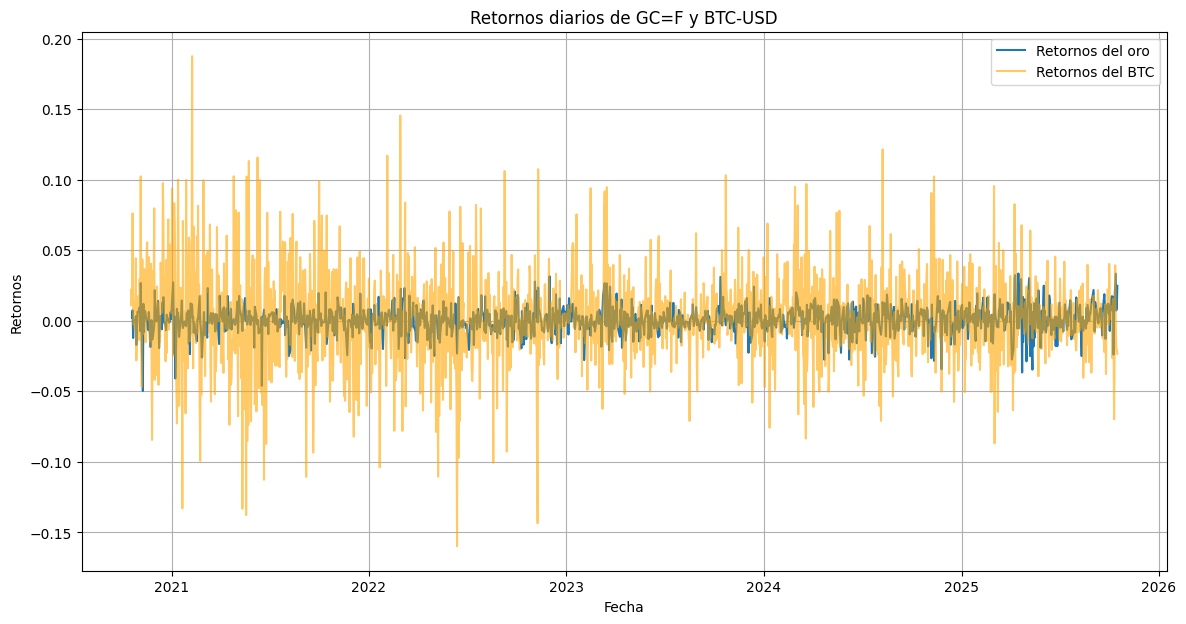

In [11]:
#Visualizar los rendimientos

plt.figure(figsize=(14, 7))

# Graficamos las columnas 'returns'
plt.plot(oro_data['returns'], label='Retornos del oro')
plt.plot(btc_data['returns'], label='Retornos del BTC', color='orange', alpha=0.6) #Retocamos la opacidad de los retornos del btc para que los retornos del oro sean visibles

# Añadimos contexto al gráfico para que sea legible y profesional.
plt.title(f'Retornos diarios de {ticker_oro} y {ticker_btc}')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.legend()  # Muestra las etiquetas (labels) que definimos en los plots.
plt.grid(True) # Añade una cuadrícula para facilitar la lectura.
plt.show() # Muestra el gráfico.

In [12]:
#Combinar los retornos y calcular la correlación

# 1. Crear un nuevo DataFrame para combinar los retornos.
combined_returns = pd.DataFrame({
    'oro_returns': oro_data['returns'],
    'btc_returns': btc_data['returns']
})

# 2. (Opcional pero muy recomendado) Eliminar filas donde falte algún dato.
#    Por ejemplo, el mercado del oro puede estar cerrado cuando el de BTC no lo está.
#    .dropna() elimina las filas con valores NaN, asegurando que solo comparamos
#    días en los que ambos activos cotizaron.
combined_returns = combined_returns.dropna()

# 3. Calcular la matriz de correlación.
#    El método .corr() calcula la correlación entre todas las columnas del DataFrame.
correlation_matrix = combined_returns.corr()

print("Matriz de Correlación:")
print(correlation_matrix)
print("\n") # Imprime una línea en blanco para separar

# 4. Extraer el valor específico que nos interesa.
#    La correlación entre el oro y BTC está en la posición (fila 0, columna 1) o (0, 1).
#    Usamos .iloc[] para acceder por posición.
correlation_value = correlation_matrix.iloc[0, 1]

print(f"La correlación entre los retornos diarios de Oro y BTC es: {correlation_value:.4f}")

Matriz de Correlación:
             oro_returns  btc_returns
oro_returns     1.000000     0.048325
btc_returns     0.048325     1.000000


La correlación entre los retornos diarios de Oro y BTC es: 0.0483
